In [1]:
import pandas as pd
import numpy as np

# EDA

For this EDA, we will only evaluate and note some of this things:

- The most relevant asociated categorical variables with our target.
- That there aren't very high correlations between numerical features.

This process is very short in this exercise because with the feature engineering present in the notebook abt01 all the variables that generated some noise were deleted.

In [2]:
df = pd.read_parquet('../data/staging/final_df.parquet')

In [3]:
df.head()

,warranty,condition,deal_ids,base_price,listing_type_id,buying_mode,parent_item_id,category_id,official_store_id,accepts_mercadopago,...,last_updated_minute,last_updated_second,date_created_year,date_created_day,date_created_hour,date_created_minute,date_created_second,stop_time_minute,stop_time_second,start_time_second
id,,,,,,,,,,,,,,,,,,,,,
MLA4695330653,otros,new,no,80.0,bronze,buy_it_now,yes,OTHERS,no,yes,...,42,58,2015,5,20,42,53,24,6,1
MLA7160447179,otros,used,no,2650.0,silver,buy_it_now,yes,OTHERS,no,yes,...,8,34,2015,26,18,8,30,24,8,3
MLA7367189936,otros,used,no,60.0,bronze,buy_it_now,yes,MLA1227,no,yes,...,57,10,2015,9,23,57,7,24,7,1
MLA9191625553,otros,new,no,580.0,silver,buy_it_now,no,OTHERS,no,yes,...,3,50,2015,28,18,47,56,24,9,3
MLA7787961817,otros,used,no,30.0,bronze,buy_it_now,yes,MLA41287,no,yes,...,37,41,2015,24,22,7,20,24,5,0


In [4]:
df.shape

(100000, 45)

In [5]:
import pandas as pd

df_numerical = df.drop(columns=['condition']).select_dtypes(include=['number'])  # Variables numéricas
df_categorical = df.select_dtypes(include=['object'])  # Variables categóricas

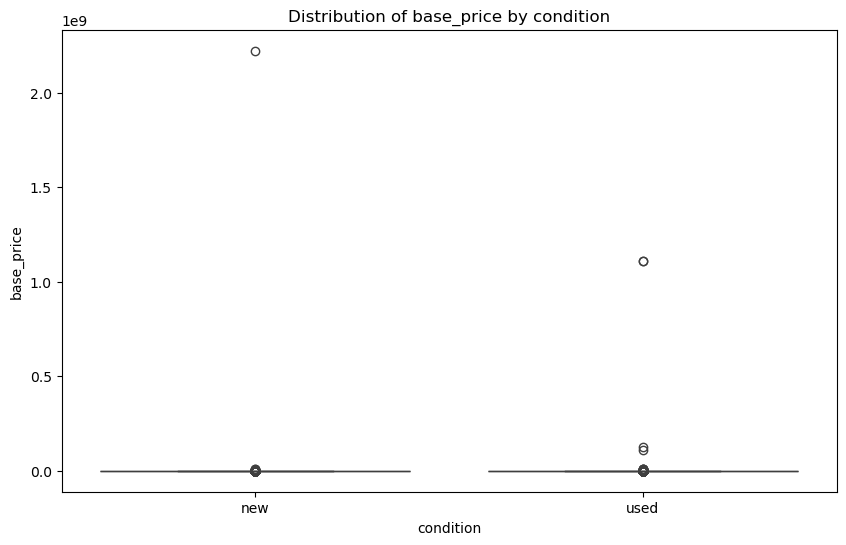

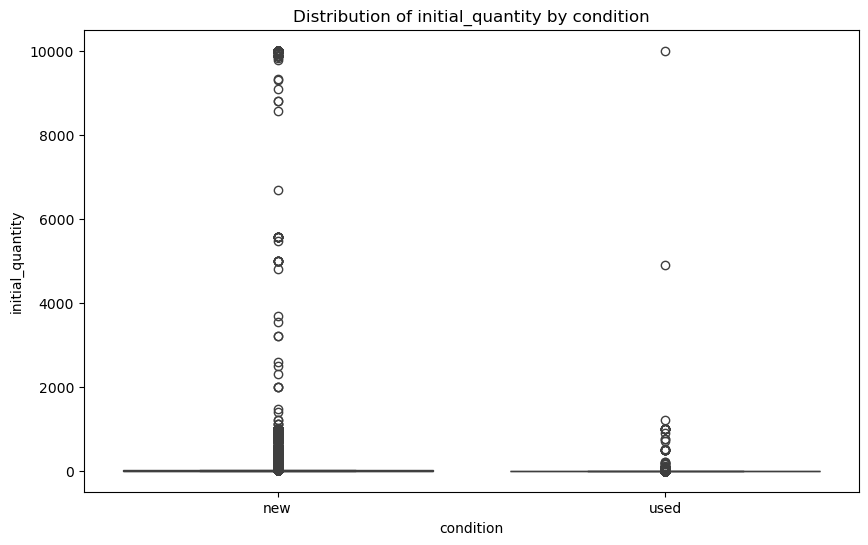

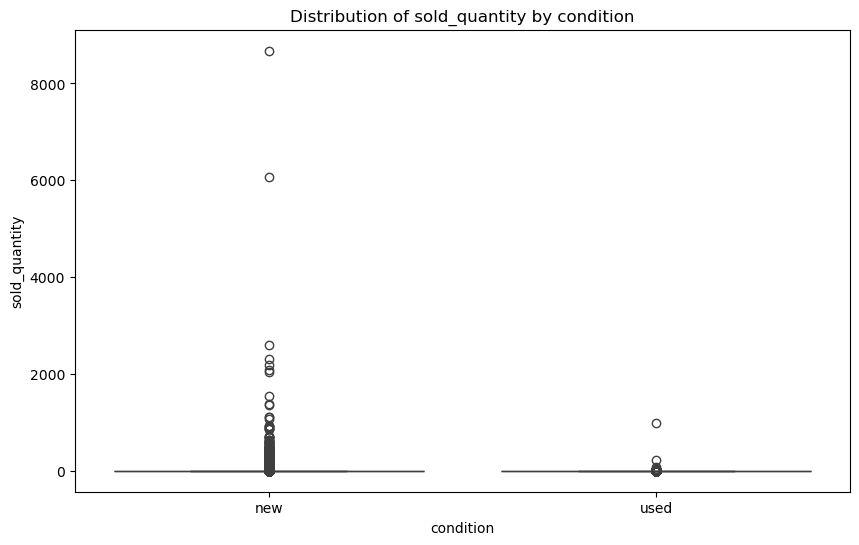

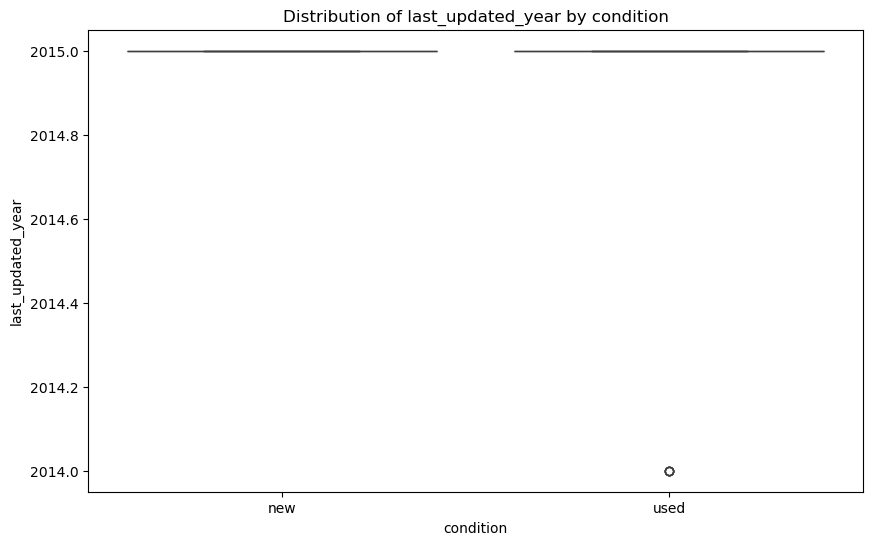

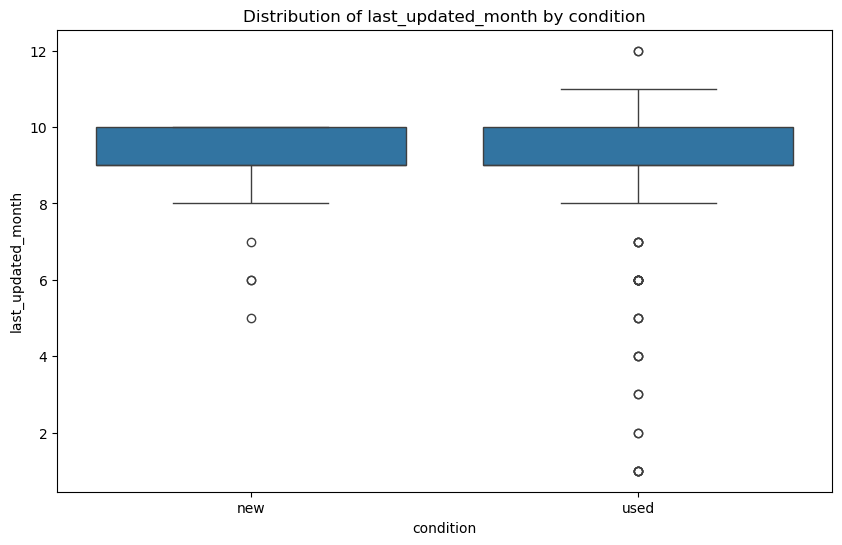

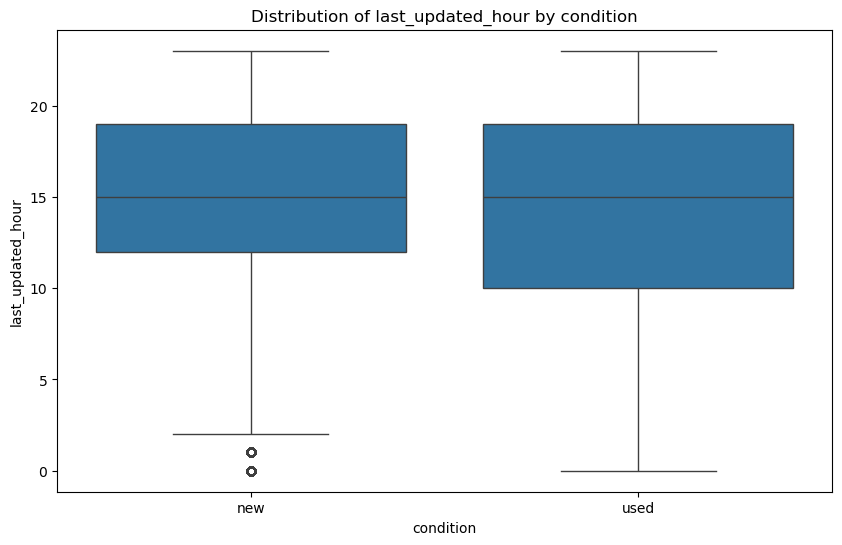

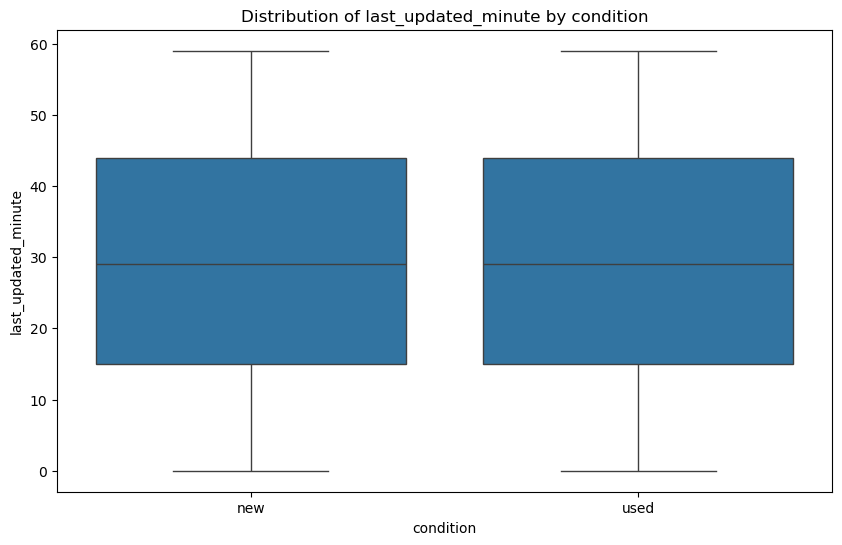

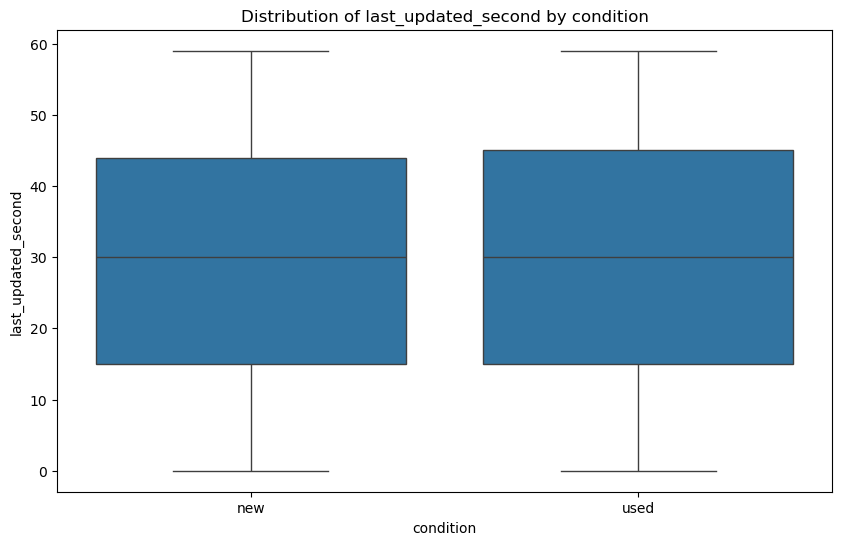

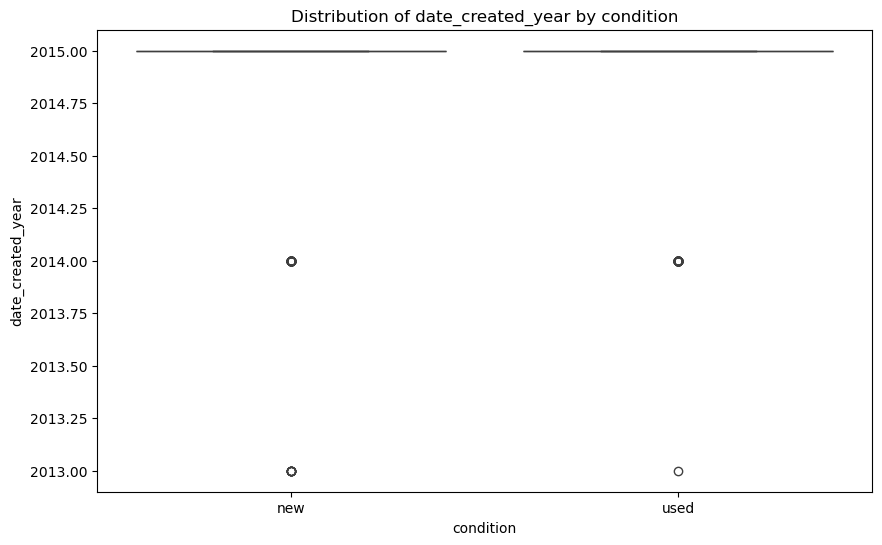

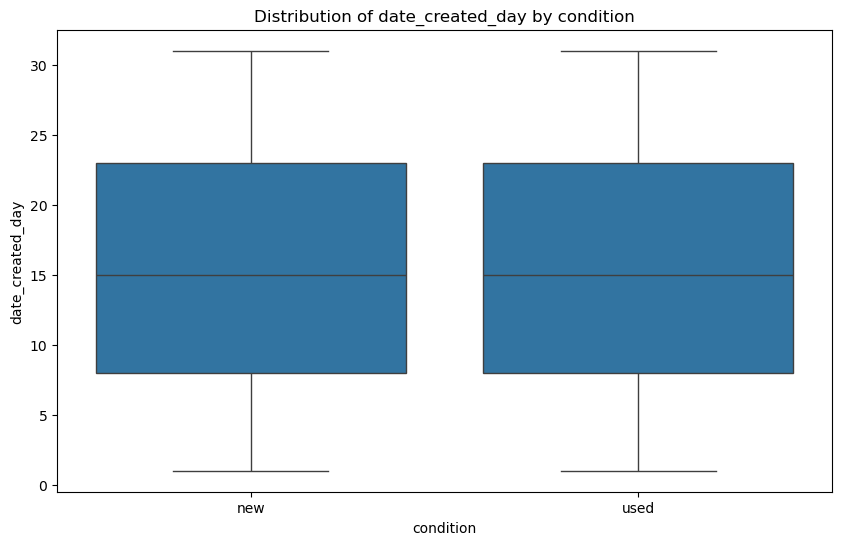

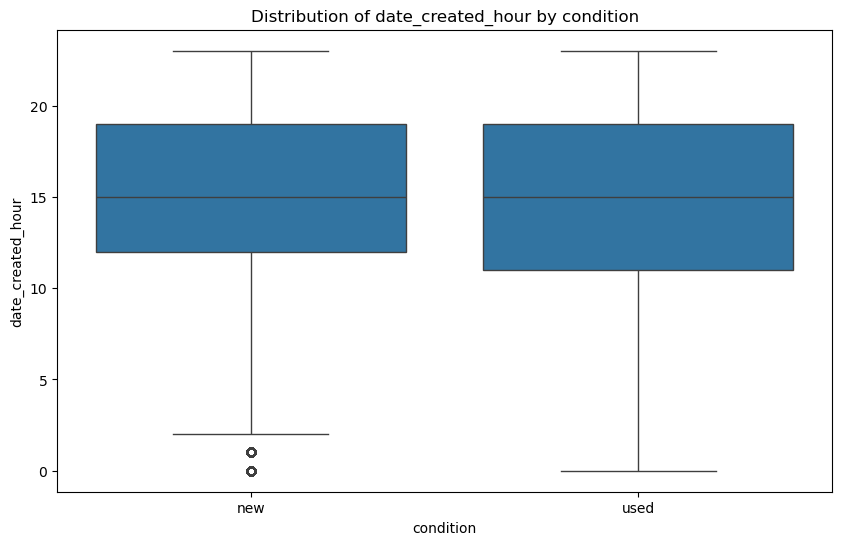

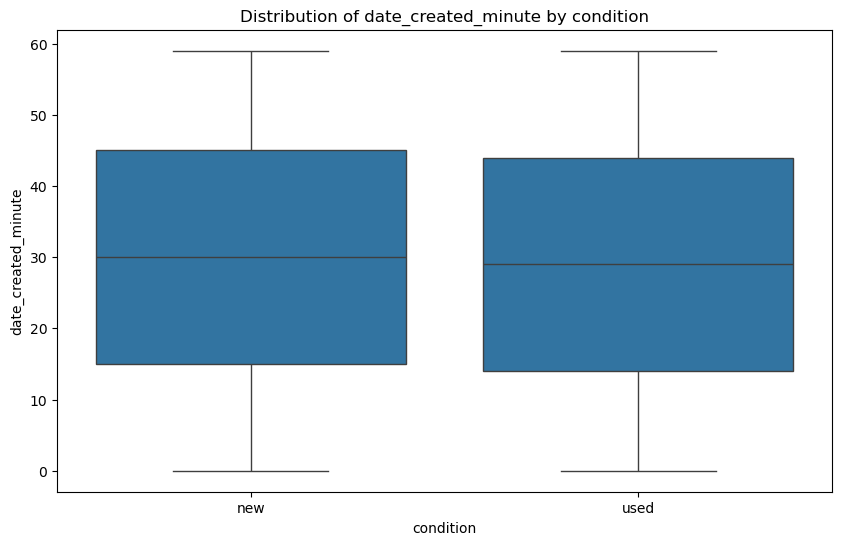

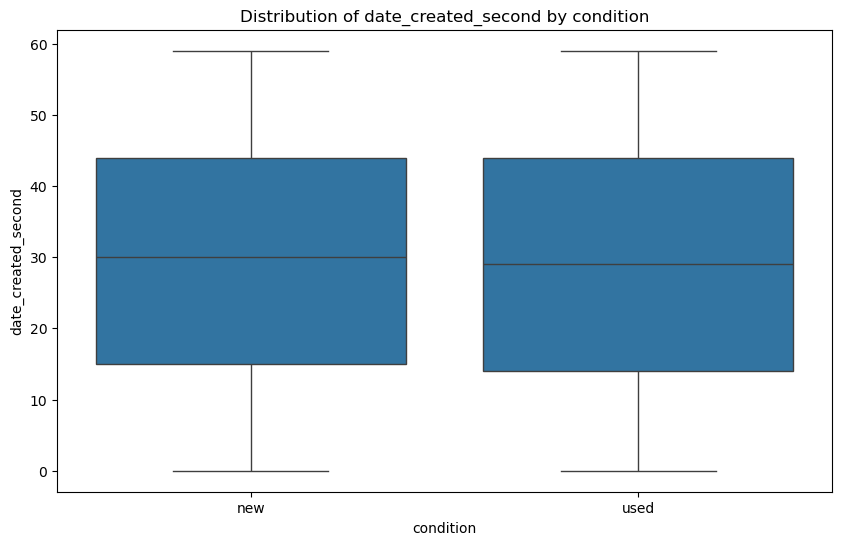

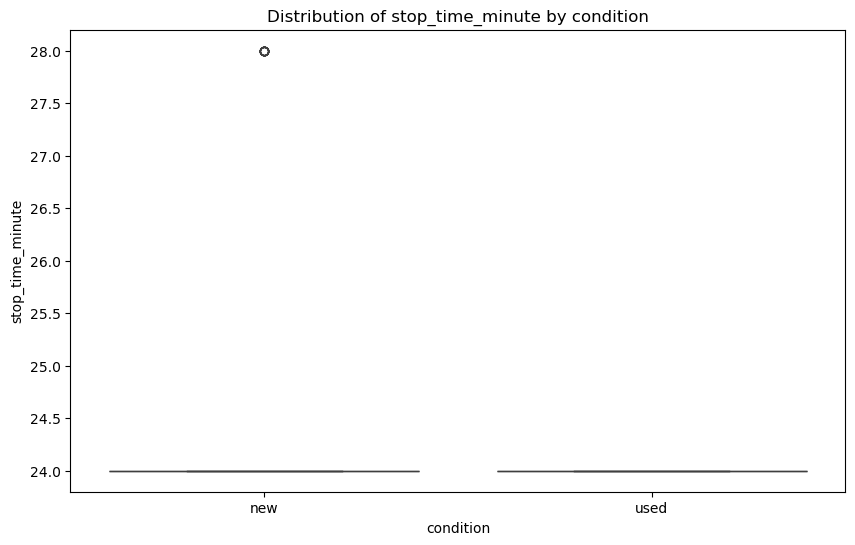

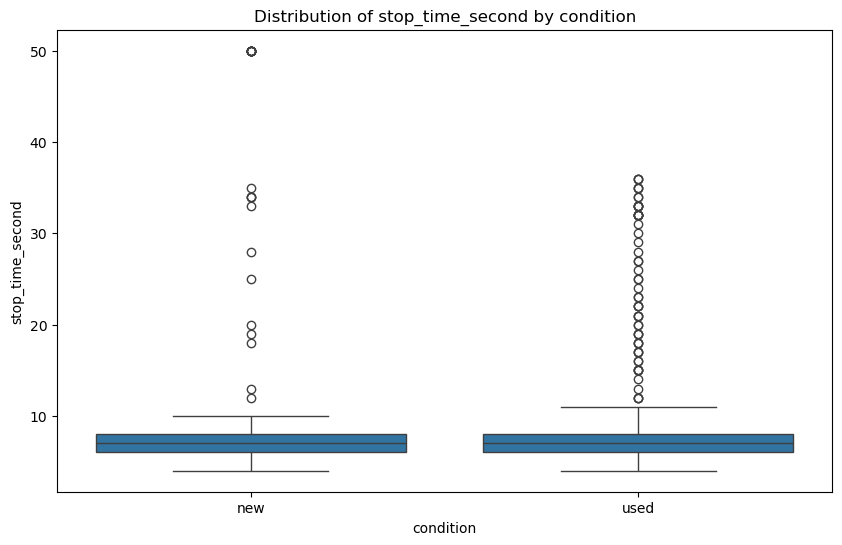

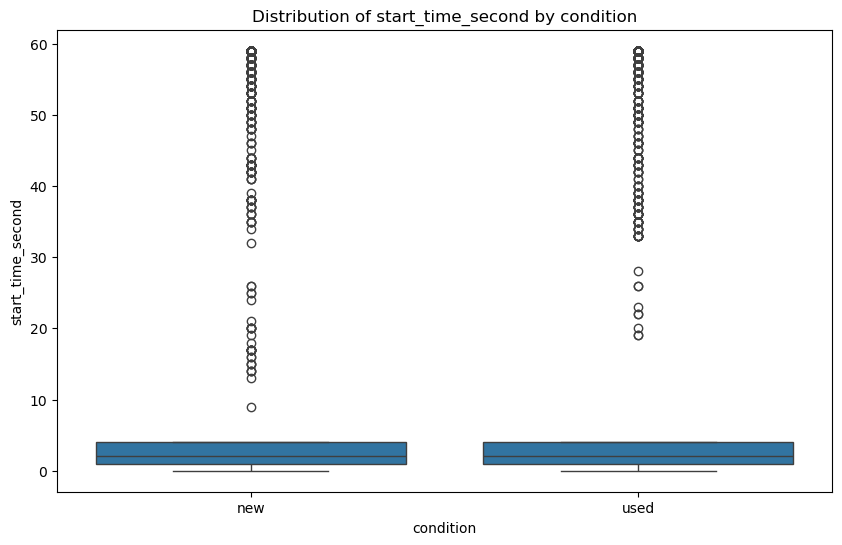

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de variables numéricas por 'condition'
for column in df_numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='condition', y=column, data=df)
    plt.title(f'Distribution of {column} by condition')
    plt.show()


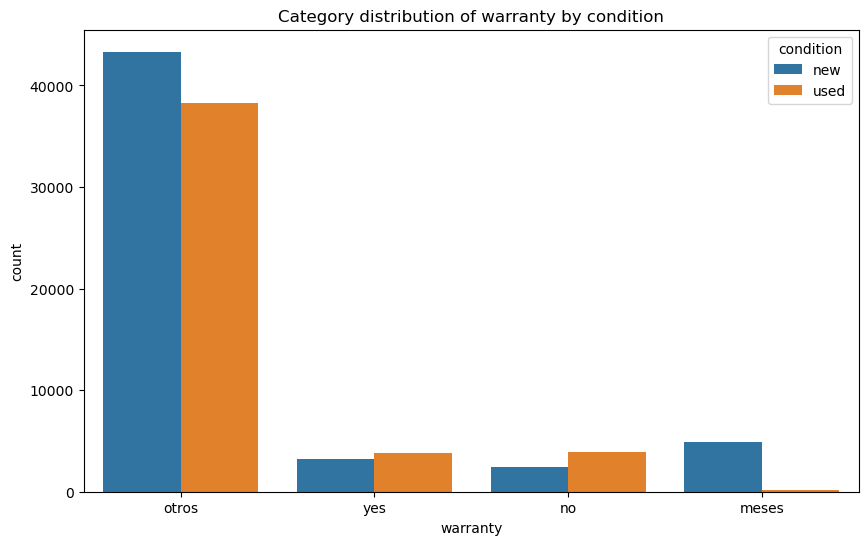

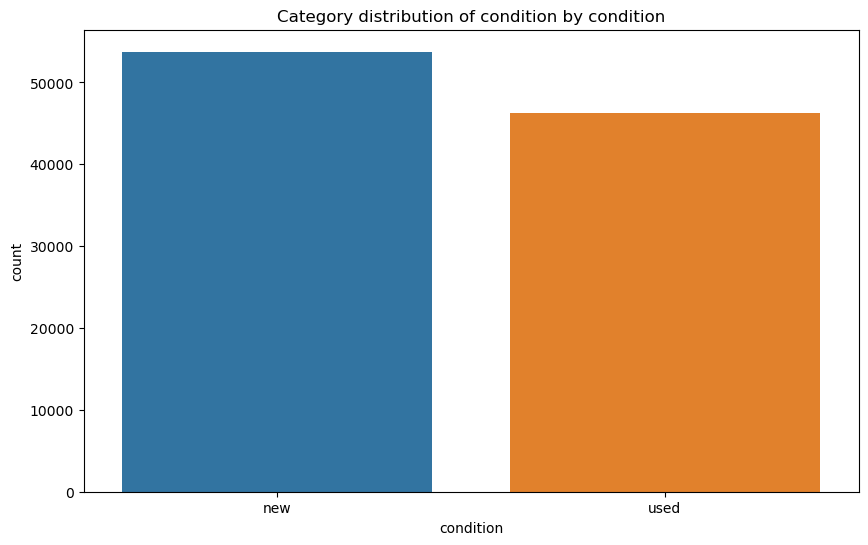

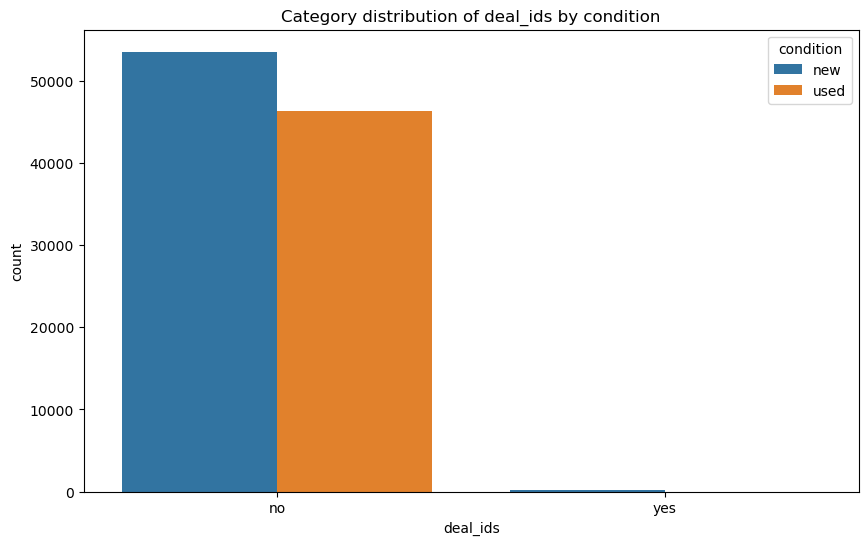

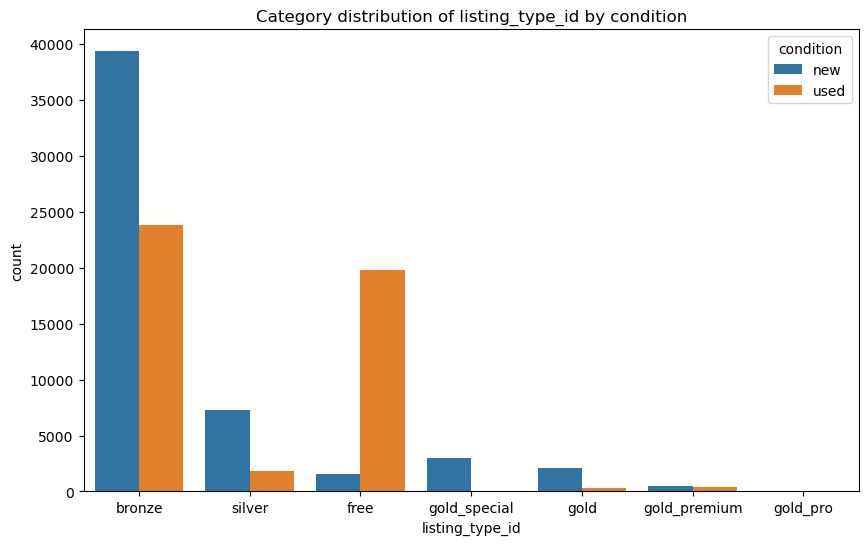

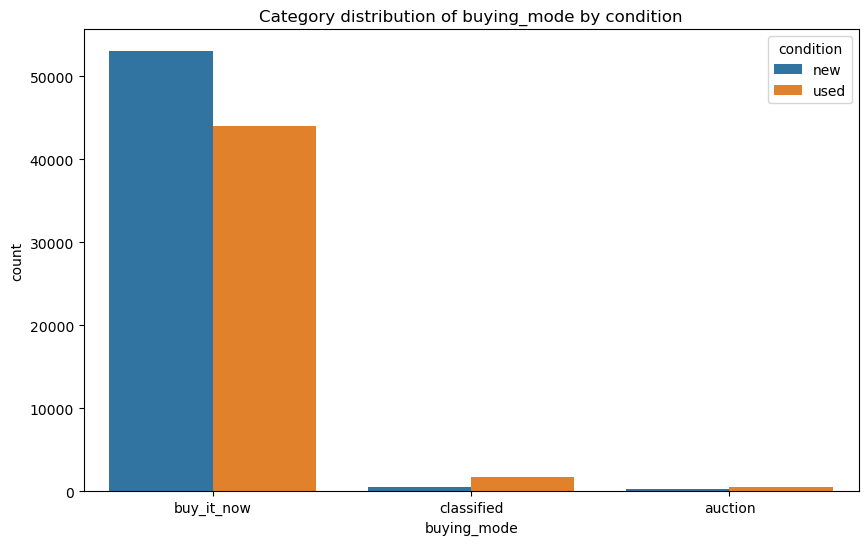

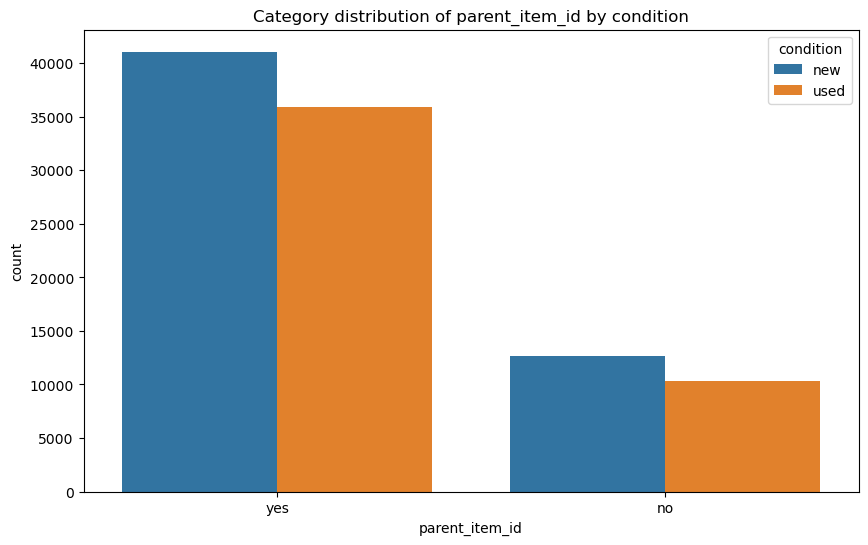

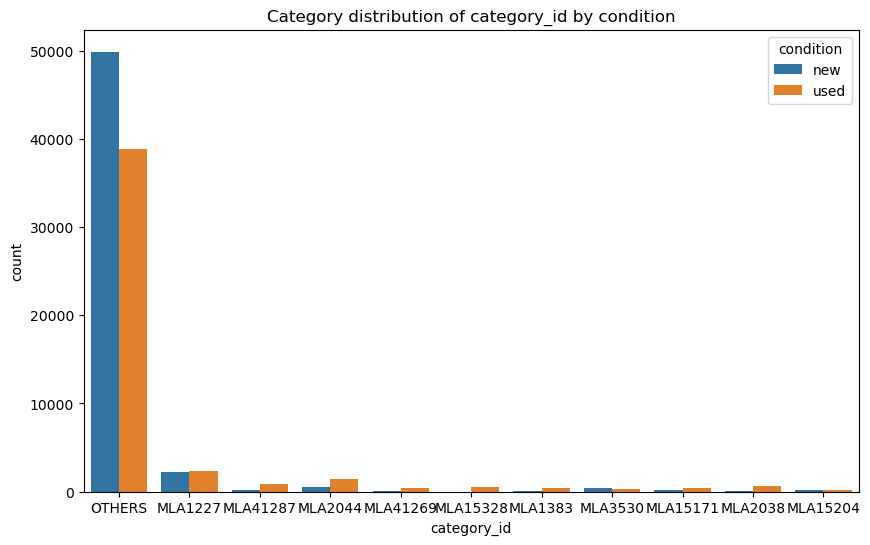

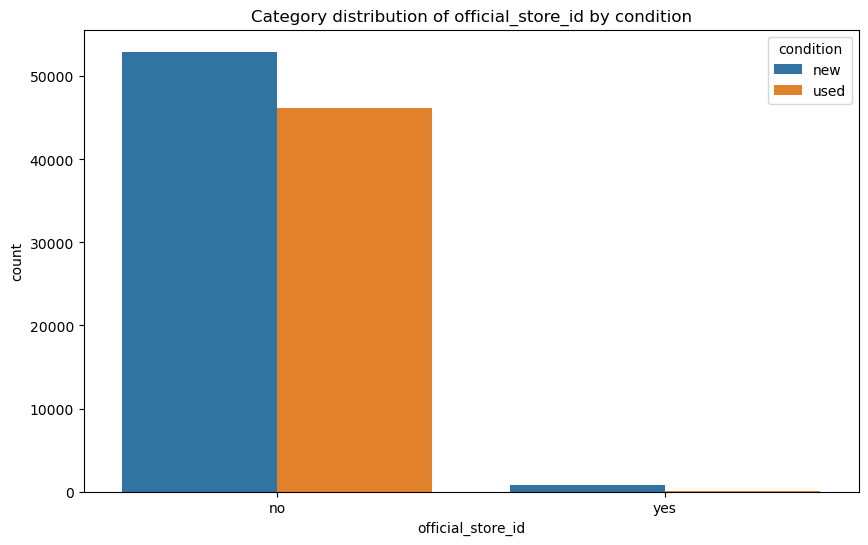

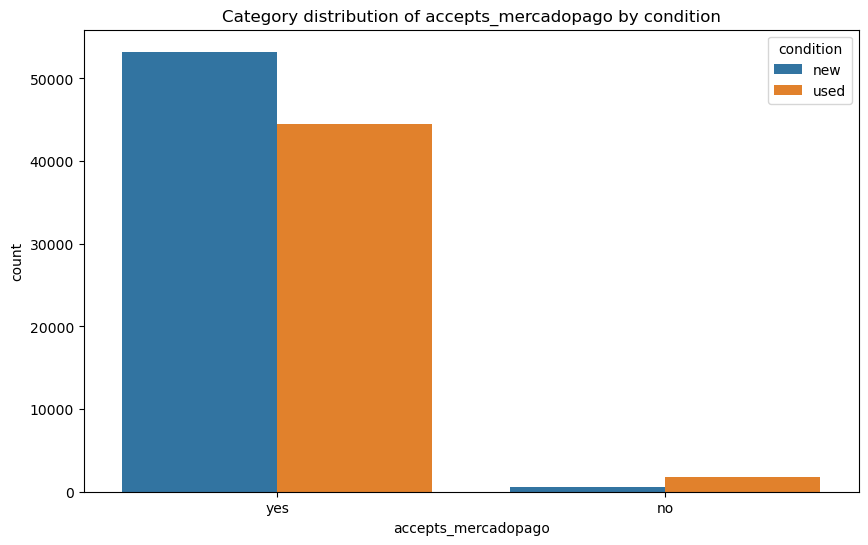

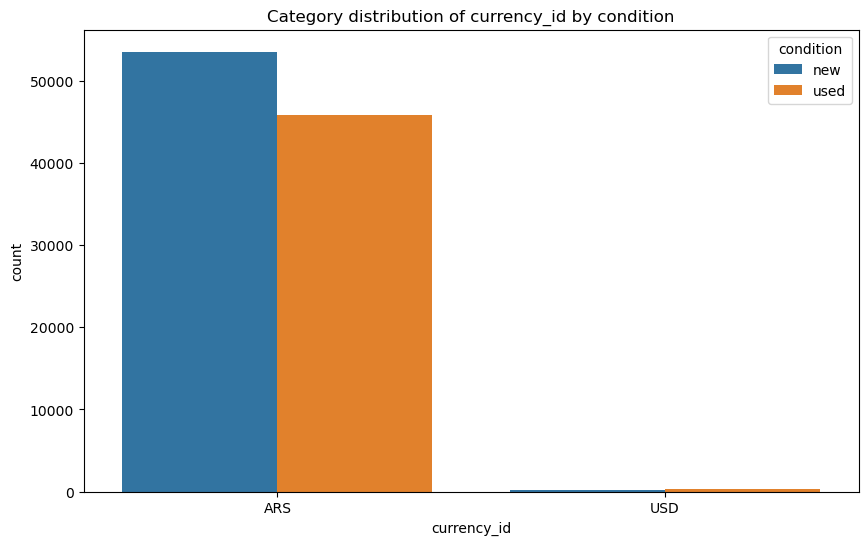

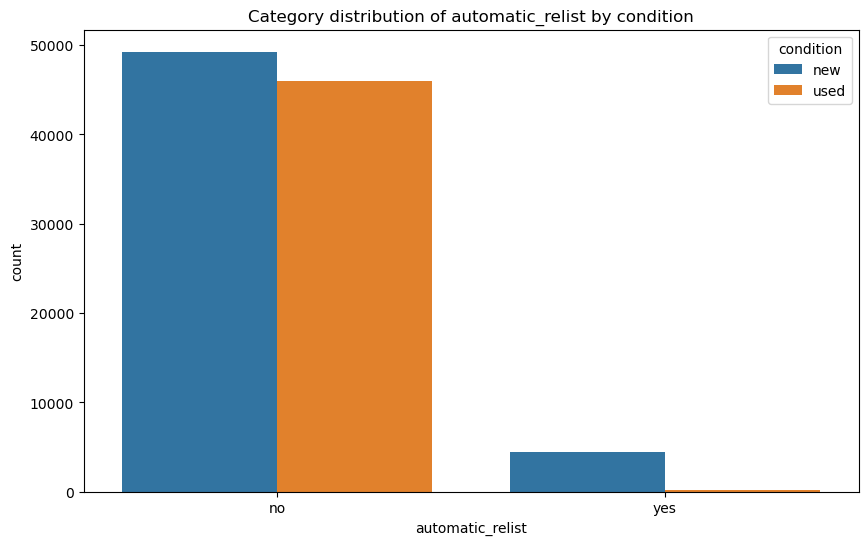

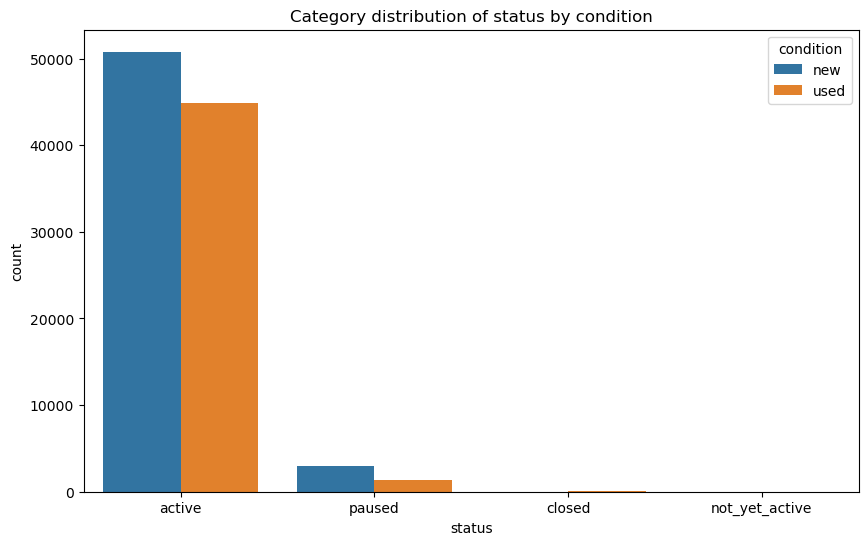

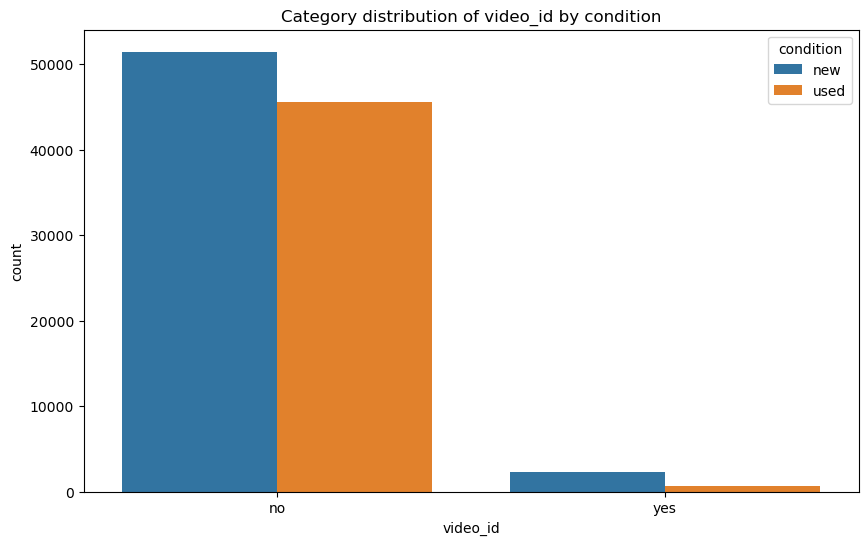

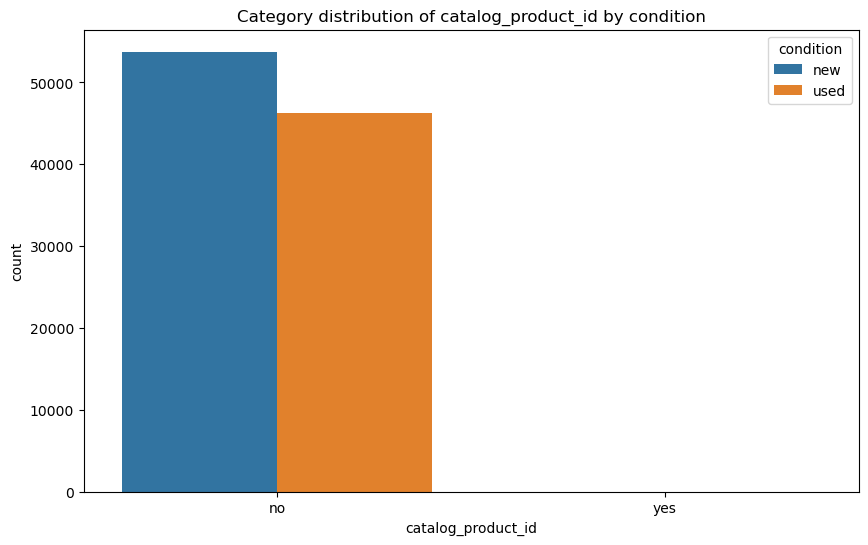

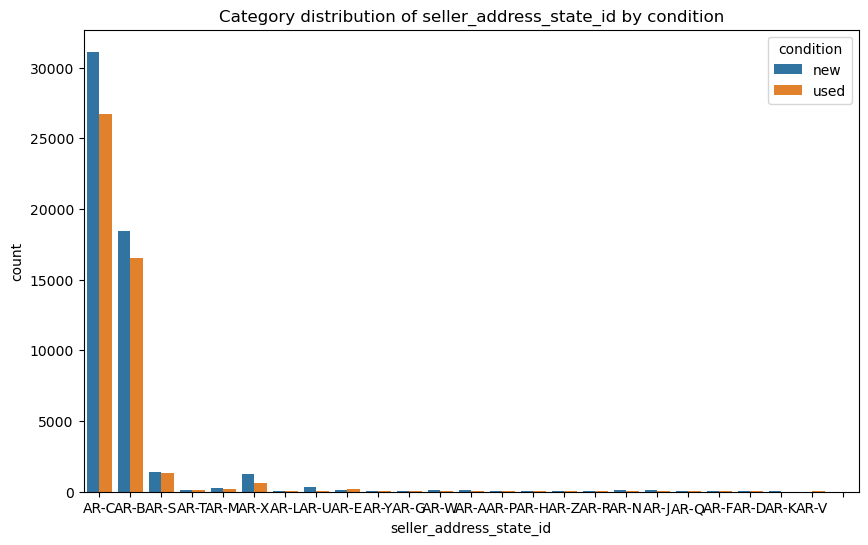

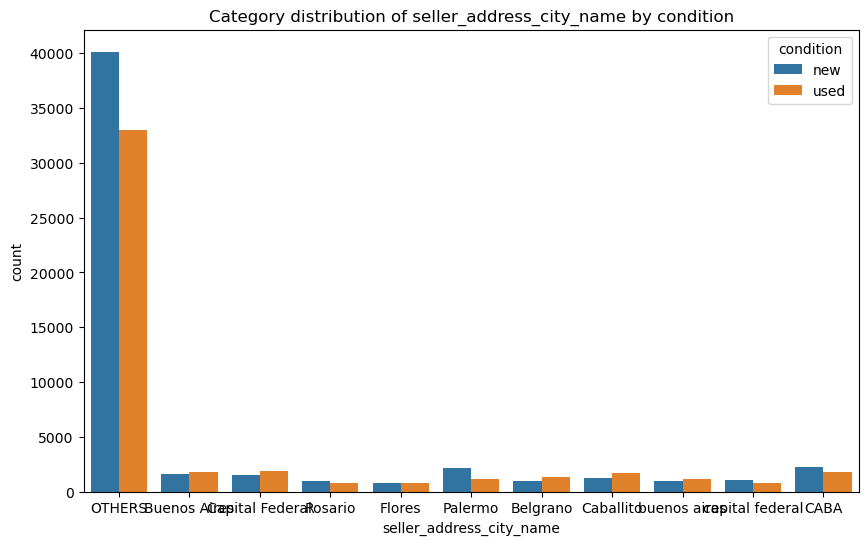

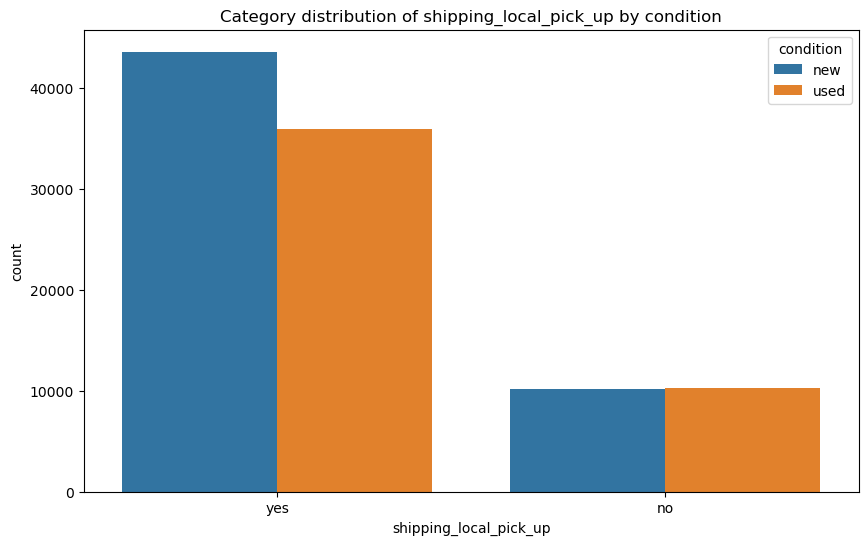

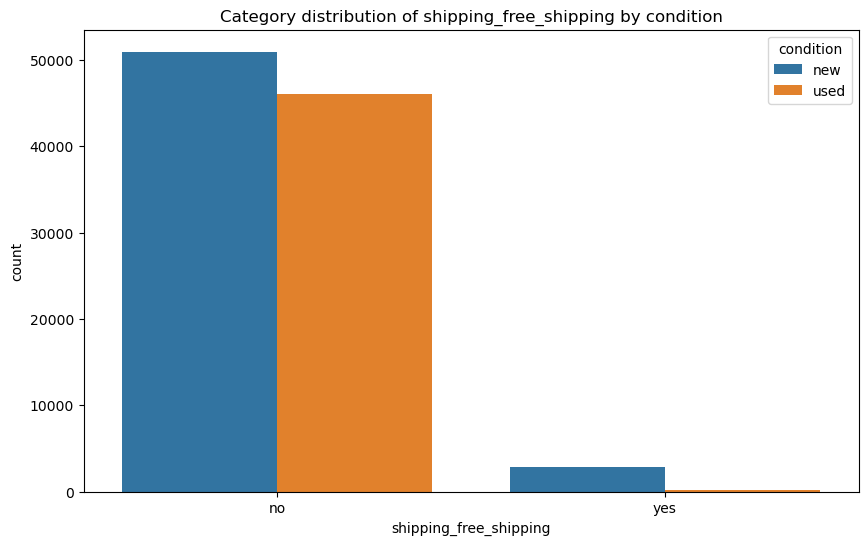

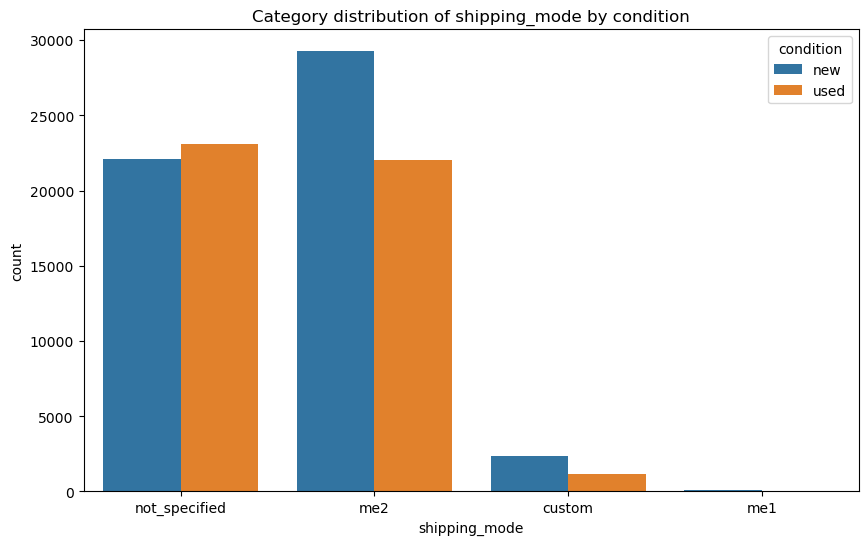

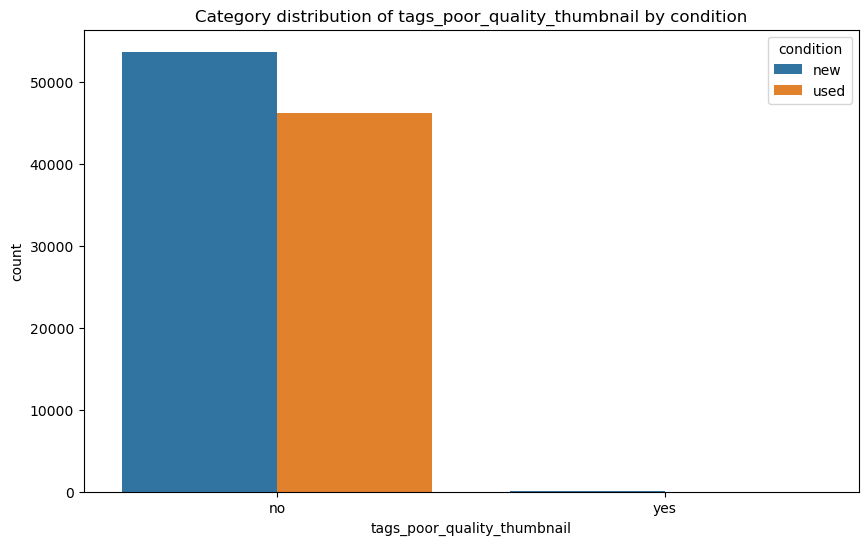

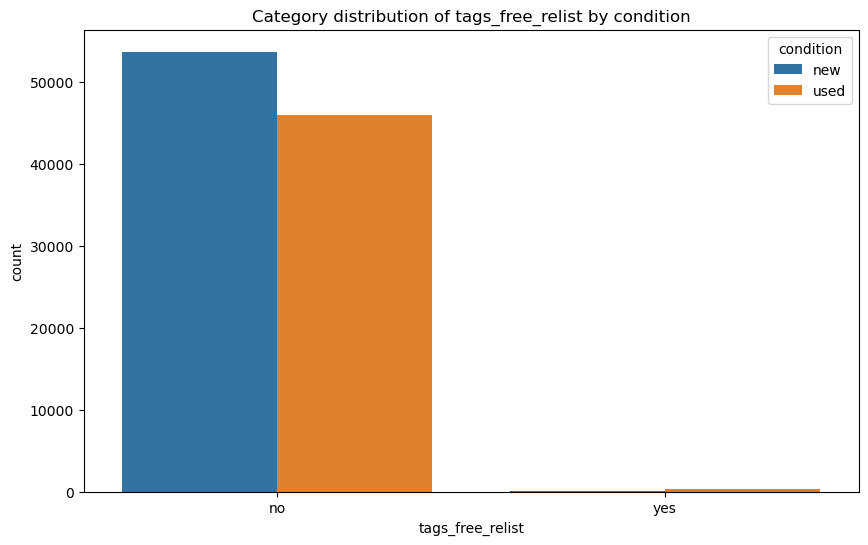

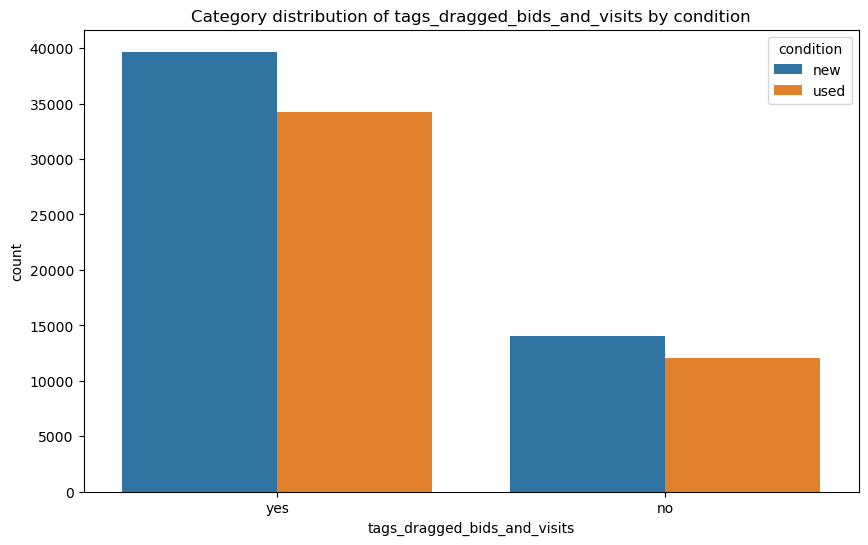

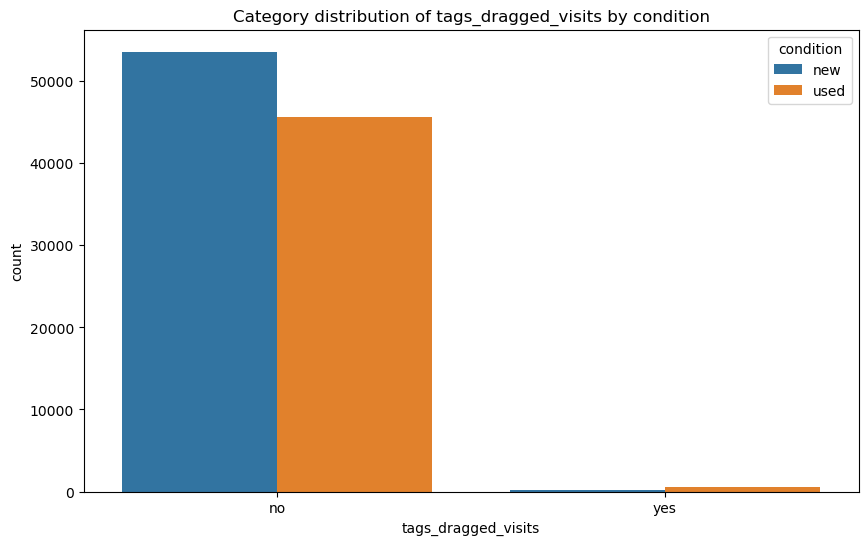

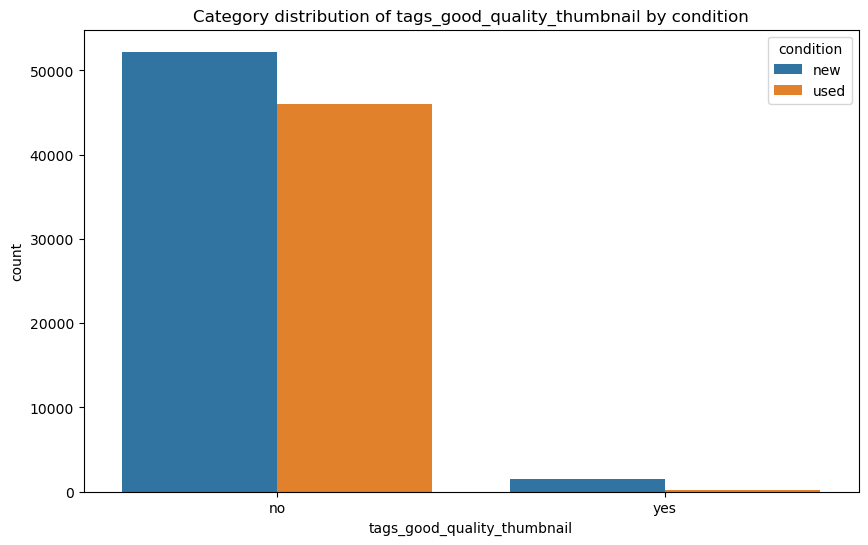

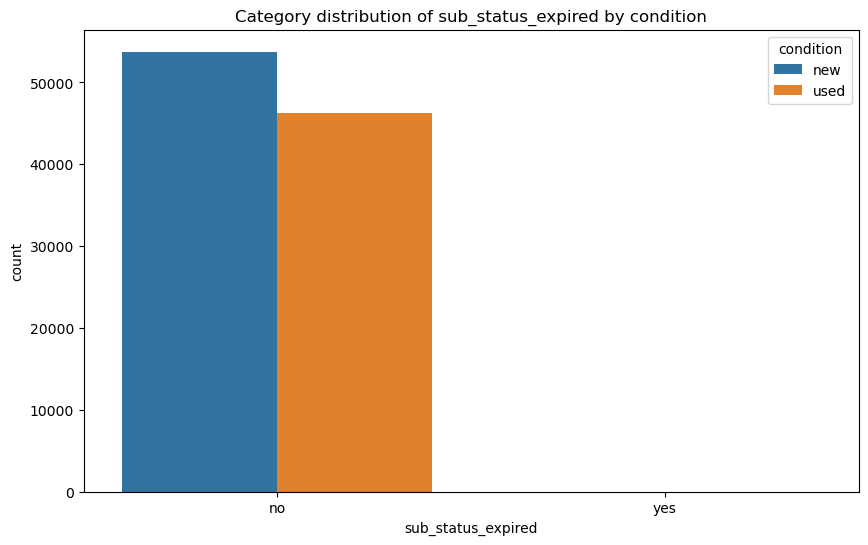

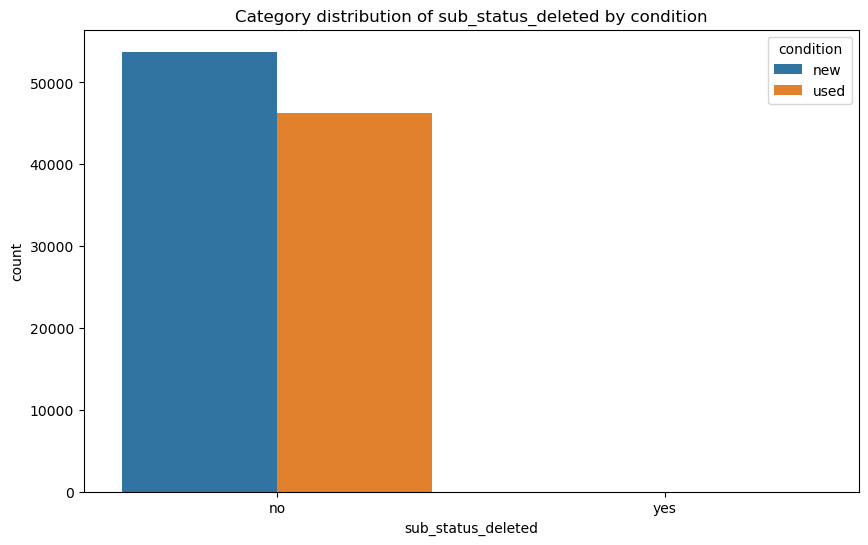

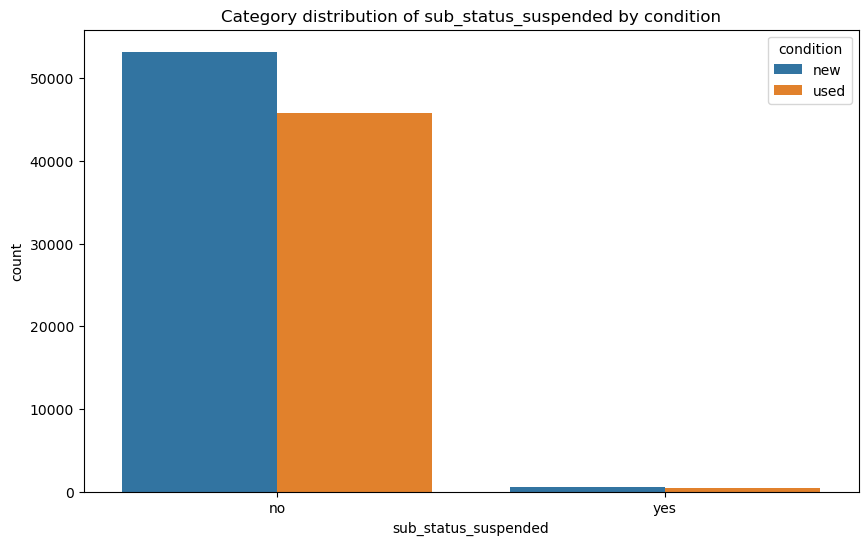

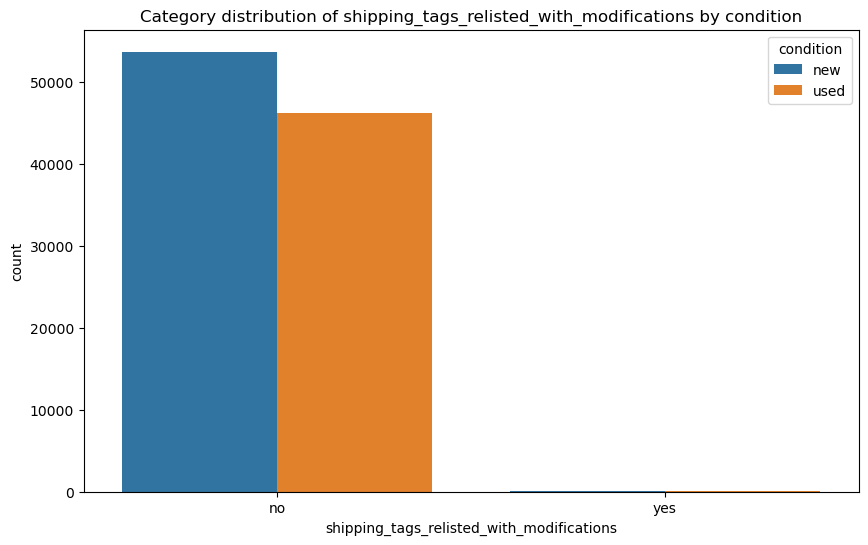

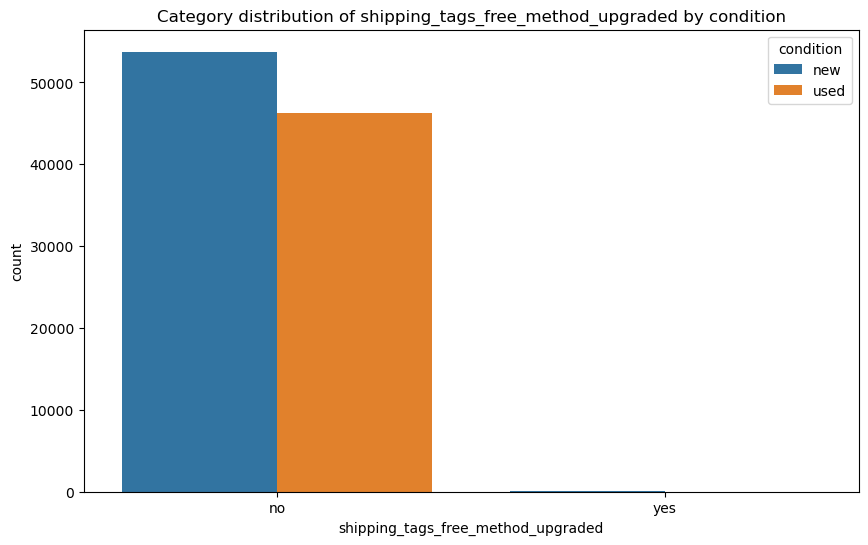

In [7]:
for column in df_categorical.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='condition', data=df)
    plt.title(f'Category distribution of {column} by condition')
    plt.show()

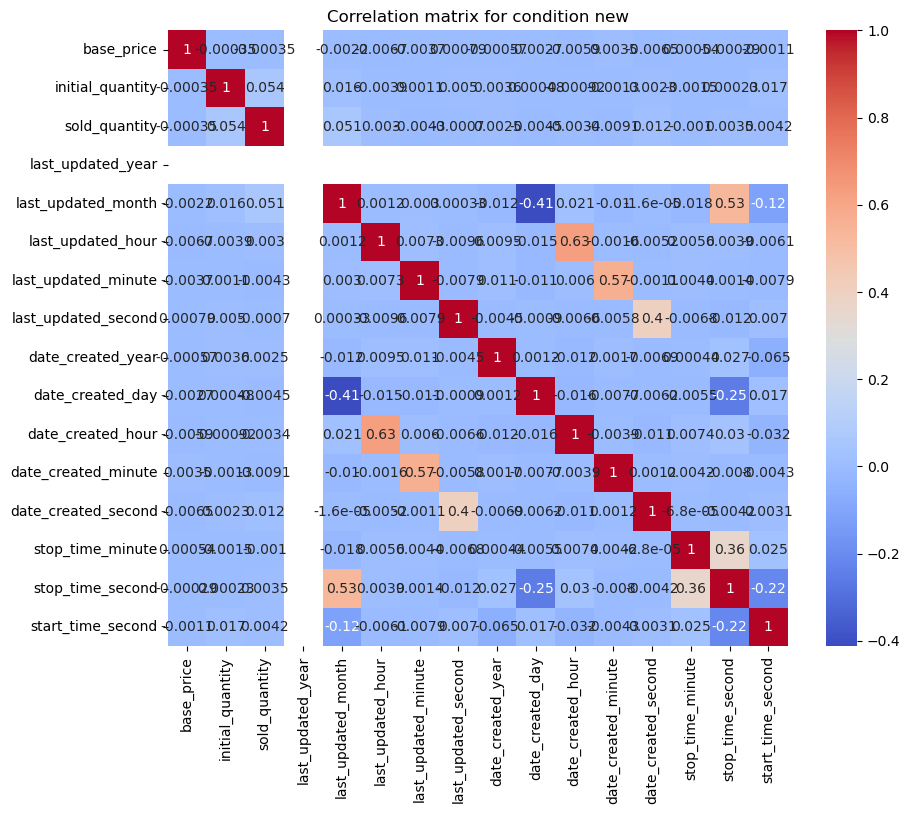

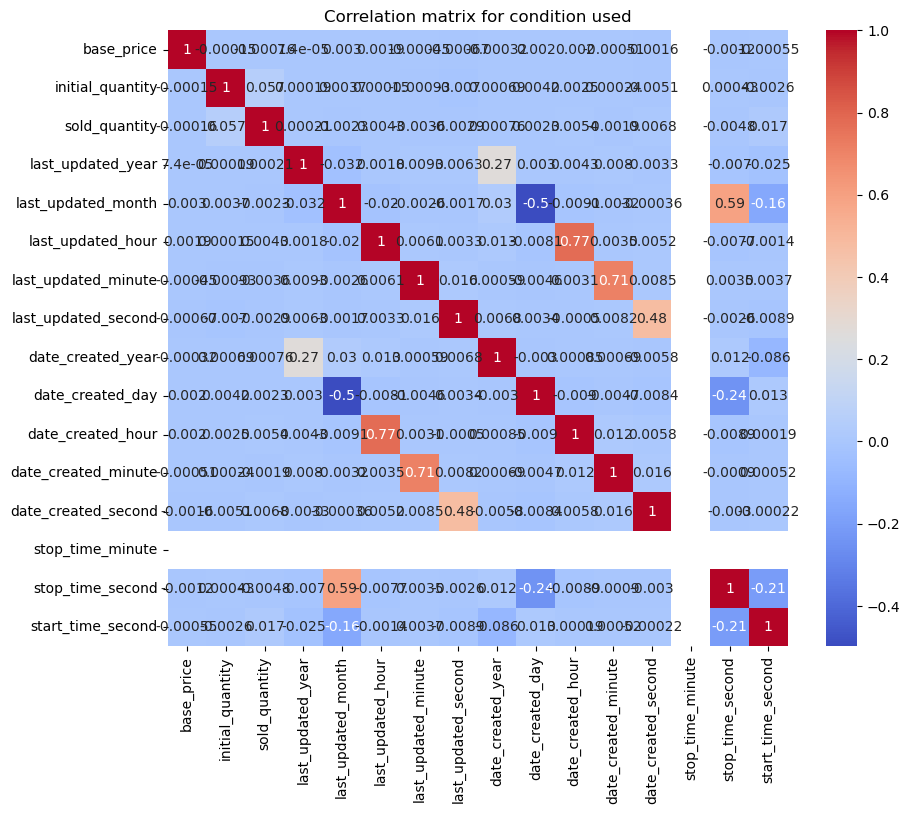

In [8]:
for cond in df['condition'].unique():
    corr_matrix = df[df['condition'] == cond][df_numerical.columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation matrix for condition {cond}')
    plt.show()


<Axes: >

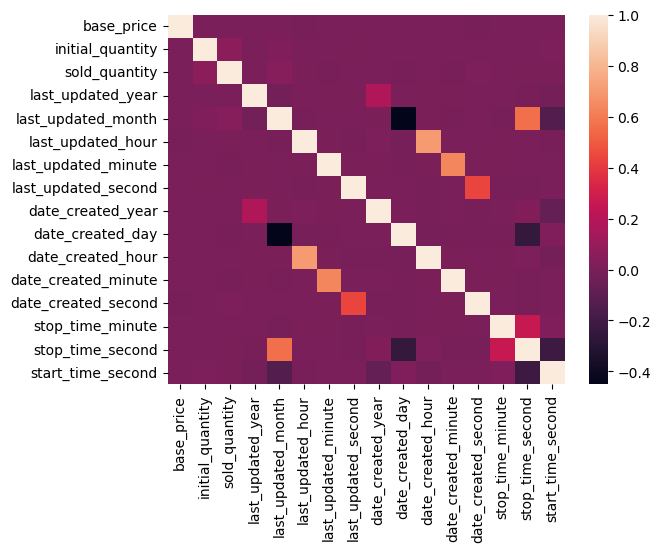

In [9]:
sns.heatmap(df_numerical.corr())

## Final notes:

- The new objects in the marketplace are more asociated with warranties.
- listing_type_id is a diferential feature. The used stuff is mainly listed ad free, while the new stuff are listed in other categories.  
- The official stores almost always sell new items.
- The usted stuff is most likely to dont accept MercadoPago.
- The items with video are most likely to be new.
- The free shiping is more asociated with new items.
- In the numerical variable, there are not very high correlations. Some of them ho to -0.4 in the negatives, and to 0.6 at maximum in the positives.